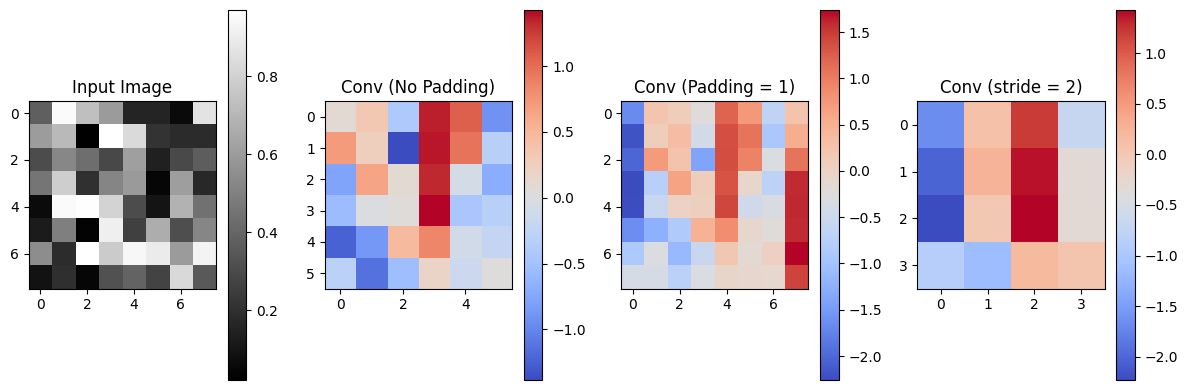

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 2D COnvolution from scratch
def conv2d(image, kernel, stride=1, padding=0):
    # add padding
    if padding > 0:
        image = np.pad(
            image,
            ((padding, padding), (padding, padding)),
            mode="constant"
        )

    img_h, img_w = image.shape
    k_h, k_w = kernel.shape

    out_h = (img_h - k_h) // stride + 1
    out_w = (img_w - k_w) // stride + 1

    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = image[
                i*stride : i*stride + k_h,
                j*stride : j*stride + k_w
            ]
            output[i, j] = np.sum(region * kernel)

    return output

# 2. Sample Image & Kernel
np.random.seed(42)

image = np.random.rand(8,8) # fake grayscale image
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])                          # vertical edge detector

# 3. apply convolution
feature_map_no_pad = conv2d(image, kernel, stride=1, padding=0)
feature_map_pad = conv2d(image, kernel, stride=1, padding=1)
feature_map_stride = conv2d(image, kernel, stride=2, padding=1)

# 4. feature map visualization
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(image, cmap="gray")
plt.title("Input Image")
plt.colorbar()

plt.subplot(1,4,2)
plt.imshow(feature_map_no_pad, cmap="coolwarm")
plt.title("Conv (No Padding)")
plt.colorbar()

plt.subplot(1,4,3)
plt.imshow(feature_map_pad, cmap="coolwarm")
plt.title("Conv (Padding = 1)")
plt.colorbar()

plt.subplot(1,4,4)
plt.imshow(feature_map_stride, cmap="coolwarm")
plt.title("Conv (stride = 2)")
plt.colorbar()

plt.tight_layout()
plt.show()